# ACI Assignment 2 - Q7 - Alexa
## Alexa Dataset
## Group number - 75

### Members name:
### Nareshkumar P (2020fc04122@wilp.bits-pilani.ac.in)
### Kommajyosula VNS Kanth (2020FC04120@wilp.bits-pilani.ac.in)
### T Navya Madhavi (2020FC04007@wilp.bits-pilani.ac.in)
### Avi Krishna Srivatsava (2020FC04492@wilp.bits-pilani.ac.in)
### Dola Tejesh (2020FC04459@wilp.bits-pilani.ac.in)

## Import Libraries and Dataset

In [1]:
#Importing Libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
from sklearn import metrics
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD

In [2]:
#Loading dataset into dataframe variable 'data'
data = pd.read_csv('amazon_alexa.csv')

## Data Visualization and Exploration

In [3]:
data.head()

,rating,date,variation,feedback
0,5,31-Jul-18,Charcoal Fabric,1
1,5,31-Jul-18,Charcoal Fabric,1
2,4,31-Jul-18,Walnut Finish,1
3,5,31-Jul-18,Charcoal Fabric,1
4,5,31-Jul-18,Charcoal Fabric,1


In [4]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
data.shape

(3150, 4)

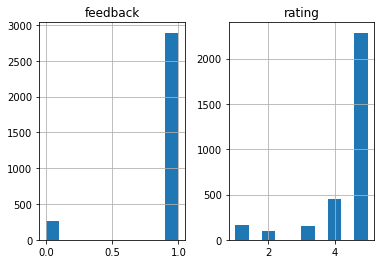

In [6]:
data.hist()
plt.show()

In [7]:
data.isnull().sum().sum()

0

## Python Q1. Changing date column to a month

In [8]:
data['month'] = pd.DatetimeIndex(data['date']).month

In [9]:
data.head()

,rating,date,variation,feedback,month
0,5,31-Jul-18,Charcoal Fabric,1,7
1,5,31-Jul-18,Charcoal Fabric,1,7
2,4,31-Jul-18,Walnut Finish,1,7
3,5,31-Jul-18,Charcoal Fabric,1,7
4,5,31-Jul-18,Charcoal Fabric,1,7


In [10]:
data.drop('date',inplace=True,axis=1)

In [11]:
data.head()

,rating,variation,feedback,month
0,5,Charcoal Fabric,1,7
1,5,Charcoal Fabric,1,7
2,4,Walnut Finish,1,7
3,5,Charcoal Fabric,1,7
4,5,Charcoal Fabric,1,7


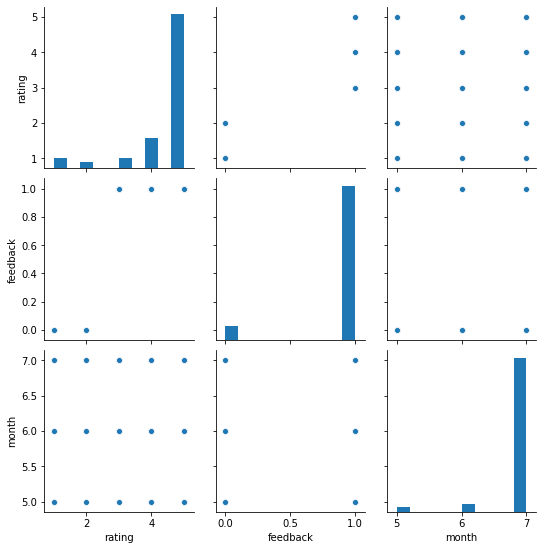

In [12]:
sns.pairplot(data,kind="scatter")
plt.show()

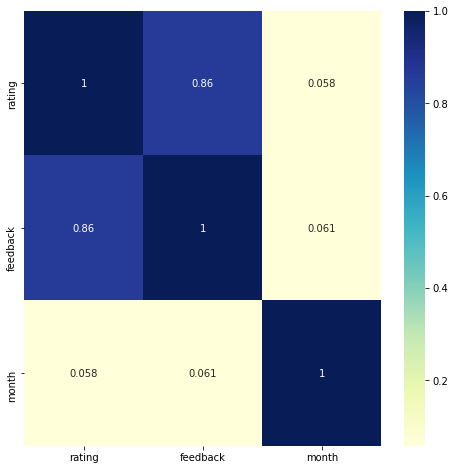

In [13]:
#To compare the features 
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

### Looks like rating and feedback features are highly correlated hence both are highly dependent

## Calcuating Conditional Probability table for the features

In [14]:
#Calcuating Conditional Probability table for the features
def condProbTable(op , given , data):
    if len(given)!=0:
        Given=list(given)
        Given.append(op)
        Probs=data.groupby(Given).size()/data.groupby(given).size()
        A = pd.DataFrame(Probs)
        Indexes = A.index
        C=pd.DataFrame()
        FirstColName='('
        for i in range(0,len( Indexes.names )-1):
            FirstColName=FirstColName+Indexes.names[i]+' '
            if(i==len(Indexes.names)-2):
                FirstColName=FirstColName+')'
            else:
                FirstColName=FirstColName+','
        C[FirstColName]=[Indexes[i][0:len(given)] for i in range(0,len(Indexes))]
        D=C.copy()
        C=C.drop_duplicates().reset_index(drop =True)
        aValues= [Indexes[i][len(given)] for i in range(0,len(Indexes))]
        for i in list(set(aValues)):
            C[op+' = '+str(i)] = 0.
        for i in range(0,len(C)):
            for j in D[D.iloc[:,0]==C.iloc[:,0][i]].index.values:
                x=list(C.iloc[i,0])
                x.append(aValues[j])
                x=tuple(x)
                C[op+' = '+str(aValues[j])][i]=A.loc[x]
    else:
        Probs=data.groupby(op).size()/len(data)
        C = pd.DataFrame(Probs)
        C.columns=['Probability']
        C.reset_index()    
    return C

In [15]:
condProbTable('feedback',given= ['variation'], data=data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,(variation ),feedback = 0,feedback = 1
0,"(Black,)",0.134100,0.865900
1,"(Black Dot,)",0.069767,0.930233
2,"(Black Plus,)",0.103704,0.896296
3,"(Black Show,)",0.067925,0.932075
4,"(Black Spot,)",0.132780,0.867220
5,"(Charcoal Fabric ,)",0.027907,0.972093
6,"(Configuration: Fire TV Stick,)",0.080000,0.920000
7,"(Heather Gray Fabric ,)",0.012739,0.987261
8,"(Oak Finish ,)",0.000000,1.000000
9,"(Sandstone Fabric ,)",0.066667,0.933333


In [16]:
condProbTable('feedback',given= ['month'], data=data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,(month ),feedback = 0,feedback = 1
0,"(5,)",0.134146,0.865854
1,"(6,)",0.154839,0.845161
2,"(7,)",0.076210,0.923790


In [17]:
condProbTable('feedback',given= ['rating'], data=data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,(rating ),feedback = 0,feedback = 1
0,"(1,)",1.0,0.0
1,"(2,)",1.0,0.0
2,"(3,)",0.0,1.0
3,"(4,)",0.0,1.0
4,"(5,)",0.0,1.0


In [18]:
condProbTable('feedback',given= ['variation', 'month'], data=data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,"(variation ,month )",feedback = 0,feedback = 1
0,"(Black, 5)",0.072727,0.927273
1,"(Black, 6)",0.141593,0.858407
2,"(Black, 7)",0.161290,0.838710
3,"(Black Dot, 7)",0.069767,0.930233
4,"(Black Plus, 6)",0.250000,0.750000
5,"(Black Plus, 7)",0.099237,0.900763
6,"(Black Show, 7)",0.067925,0.932075
7,"(Black Spot, 7)",0.132780,0.867220
8,"(Charcoal Fabric , 7)",0.027907,0.972093
9,"(Configuration: Fire TV Stick, 7)",0.080000,0.920000


In [19]:
condProbTable('feedback',given= ['variation', 'rating'], data=data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,"(variation ,rating )",feedback = 0,feedback = 1
0,"(Black, 1)",1.0,0.0
1,"(Black, 2)",1.0,0.0
2,"(Black, 3)",0.0,1.0
3,"(Black, 4)",0.0,1.0
4,"(Black, 5)",0.0,1.0
...,...,...,...
68,"(White Spot, 1)",1.0,0.0
69,"(White Spot, 2)",1.0,0.0
70,"(White Spot, 3)",0.0,1.0
71,"(White Spot, 4)",0.0,1.0


In [20]:
condProbTable('feedback',given= ['month', 'rating'], data=data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,"(month ,rating )",feedback = 0,feedback = 1
0,"(5, 1)",1.0,0.0
1,"(5, 2)",1.0,0.0
2,"(5, 3)",0.0,1.0
3,"(5, 4)",0.0,1.0
4,"(5, 5)",0.0,1.0
5,"(6, 1)",1.0,0.0
6,"(6, 2)",1.0,0.0
7,"(6, 3)",0.0,1.0
8,"(6, 4)",0.0,1.0
9,"(6, 5)",0.0,1.0


In [21]:
condProbTable('feedback',given= ['month', 'rating', 'variation'], data=data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,"(month ,rating ,variation )",feedback = 0,feedback = 1
0,"(5, 1, Black)",1.0,0.0
1,"(5, 1, White)",1.0,0.0
2,"(5, 2, White)",1.0,0.0
3,"(5, 3, Black)",0.0,1.0
4,"(5, 4, Black)",0.0,1.0
...,...,...,...
89,"(7, 5, White)",0.0,1.0
90,"(7, 5, White Dot)",0.0,1.0
91,"(7, 5, White Plus)",0.0,1.0
92,"(7, 5, White Show)",0.0,1.0


In [22]:
data.variation.unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [23]:
'''Assigning variations values to unique numbers
1 -> Charcoal Fabric
2 -> Walnut Finish
3 -> Heather Gray Fabric
4 -> Sandstone Fabric
5 -> Oak Finish
6 -> Black
7 -> White
8 -> Black Spot
9 -> White Spot
10 -> Black Show
11 -> White Show
12 -> Black Plus
13 -> White Plus
14 -> Configuration: Fire TV Stick
15 -> Black  Dot
16 -> White  Dot '''

data['variation'].replace(to_replace=['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], value=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], inplace=True)

In [24]:
data.describe()

,rating,variation,feedback,month
count,3150.000000,3150.000000,3150.000000,3150.000000
mean,4.463175,9.486984,0.918413,6.898730
std,1.068506,5.006156,0.273778,0.378316
min,1.000000,1.000000,0.000000,5.000000
25%,4.000000,6.000000,1.000000,7.000000
50%,5.000000,10.000000,1.000000,7.000000
75%,5.000000,14.000000,1.000000,7.000000
max,5.000000,16.000000,1.000000,7.000000


## Model Building

## Python Q2. Construct Bayesian Belief Network

In [25]:
model = BayesianModel([("variation","rating"),("month","rating"),("rating","feedback")])

#Calculating CPD and validating the model
cpd_variation = TabularCPD('variation', 2, values=[[0.2], [0.8]])
cpd_month = TabularCPD('month', 2, values=[[0.2], [0.8]])
cpd_rating = TabularCPD('rating', 2, values=[[0.3, 0.75, 0.6,  0.2],
                            [0.7, 0.25, 0.4, 0.8]], evidence=['variation', 'month'], evidence_card=[2, 2])
cpd_feedback = TabularCPD('feedback', 2, values=[[0.1, 0.4, 0.99],
                            [0.9, 0.6, 0.01]], evidence=['rating'], evidence_card=[3])
model.add_cpds(cpd_variation, cpd_month, cpd_rating, cpd_feedback)
model.check_model()


True

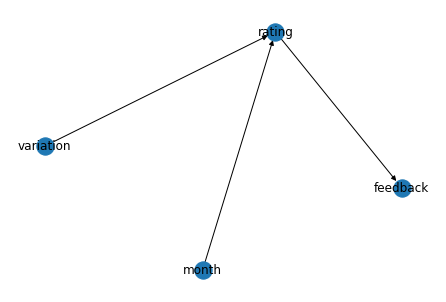

In [26]:
import networkx as nx
import pylab as plt
nx.draw(model, with_labels=True)
plt.show()

In [27]:
model.fit(data)

## Python Q3. Infer the probability for the data {Rating: 4, Month: July, Variation: Black Plus (alternate value: 12), feedback: 1}

In [28]:
infer = VariableElimination(model)
print(infer.query(['feedback'],evidence={'rating': 4,'month': 7,'variation': 12}))

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-------------+-----------------+
| feedback    |   phi(feedback) |
+=============+=================+
| feedback(0) |          0.0000 |
+-------------+-----------------+
| feedback(1) |          1.0000 |
+-------------+-----------------+


## Python Q4. Check the probability of rating being low (1 or 2) for the data {Variation: Charcoal Fabric (alternate value: 1), month: July, feedback: 0}

In [29]:
print(infer.query(['rating'],evidence={'variation': 1,'month': 7,'feedback': 0}))

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| rating    |   phi(rating) |
+===========+===============+
| rating(1) |        0.3333 |
+-----------+---------------+
| rating(2) |        0.6667 |
+-----------+---------------+
| rating(3) |        0.0000 |
+-----------+---------------+
| rating(4) |        0.0000 |
+-----------+---------------+
| rating(5) |        0.0000 |
+-----------+---------------+


## Prolog Q1.Build a decision tree using decision tree classifier algorithm 

In [30]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [31]:
X = data[['variation','month','rating']]
y = data['feedback']

In [32]:
# Fit the decision tree classifier
clf = DecisionTreeClassifier(random_state=1234)
model_dt = clf.fit(X, y)

In [33]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.50
|   |--- class: 0
|--- feature_2 >  2.50
|   |--- class: 1



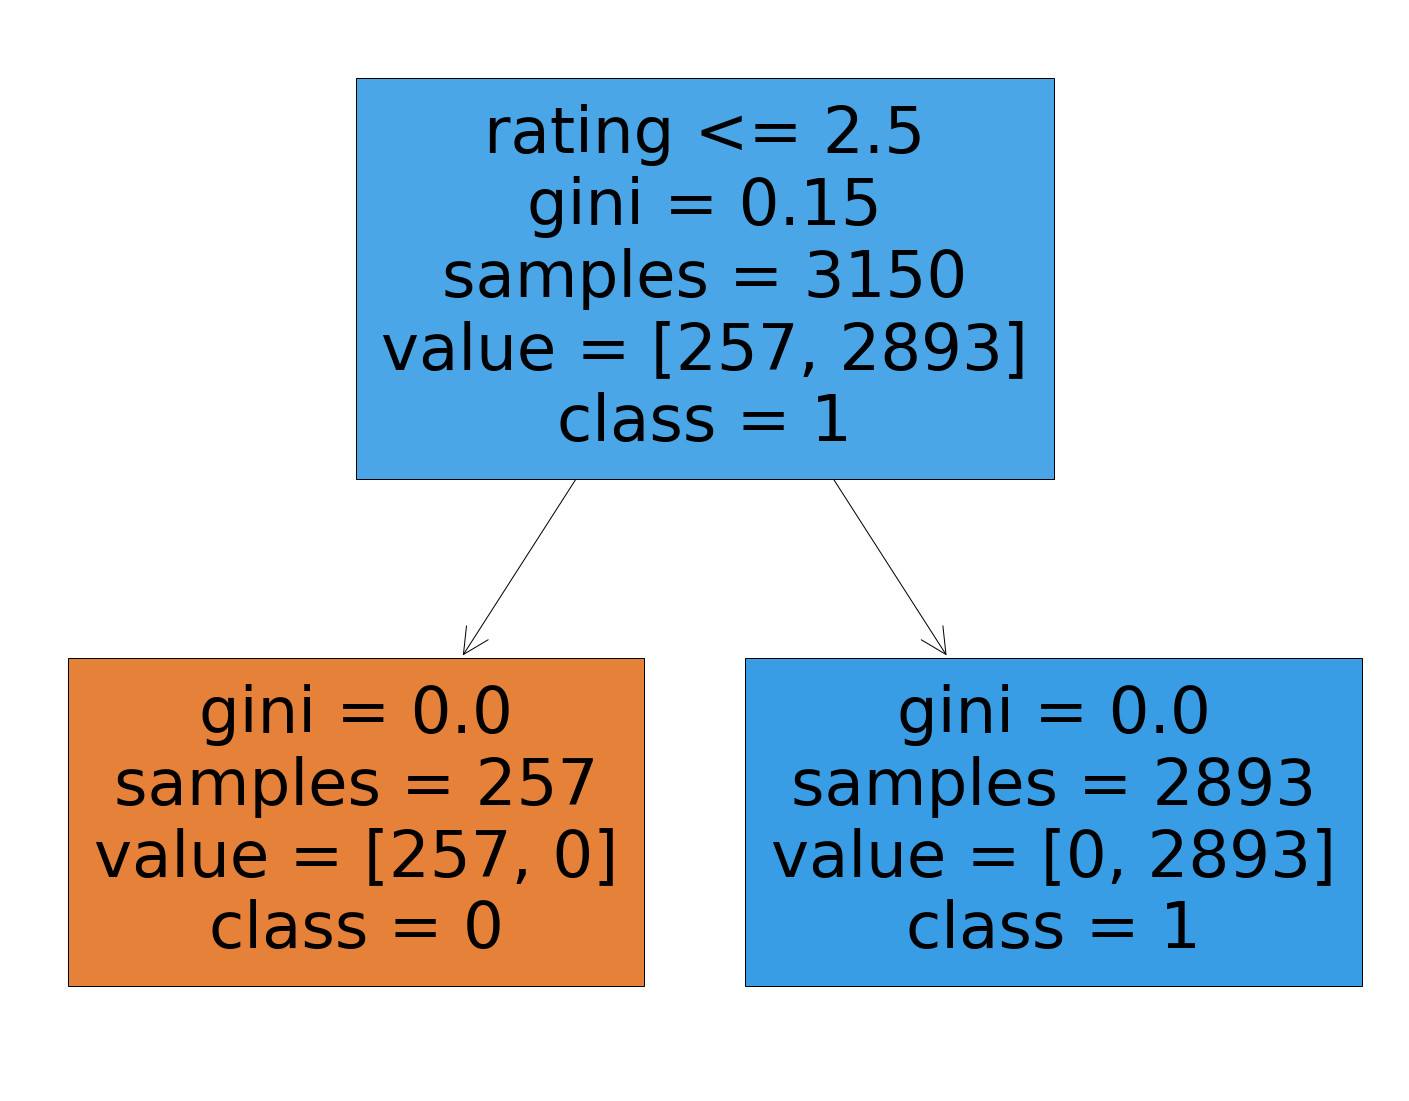

In [34]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names= ['variation','month','rating'],  
                   class_names=['0','1'],
                   filled=True)